# Examples UML

In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
import random
import csv
random.seed(555)
import matplotlib.pyplot as plt
%matplotlib inline

autotexts = datasets.fetch_20newsgroups(categories=['rec.autos'], remove=('headers', 'footers', 'quotes'), subset='train')['data']
religiontexts = datasets.fetch_20newsgroups(categories=['soc.religion.christian'], remove=('headers', 'footers', 'quotes'), subset='train')['data']

texts = autotexts[:20] + religiontexts[:20]
random.shuffle(texts)

In [2]:
len(religiontexts), len(autotexts)

(599, 594)

In [3]:
datasets.fetch_20newsgroups?

In [3]:
religiontexts[0], autotexts[0]

('I wrote in response to dlecoint@garnet.acns.fsu.edu (Darius_Lecointe):\n\n\nWas Paul a God too? Is an interpretation of the words of Paul of higher\npriority than the direct word of Jesus in Matt5:14-19? Paul begins\nRomans 14 with "If someone is weak in the faith ..." Do you count\nyourself as one who is weak in the faith?\n\n\nYes, but what does the Bible have to say? What did Jesus say? Paul\ncloses Romans 14 with, "On the other hand, the person with doubts about\nsomething who eats it anyway is guilty, because he isn\'t acting on his\nfaith, and any failure to act on faith is a sin." Gaus, ISBN:0-933999-99-2\nHave you read the Ten Commandments which are a portion of the Law? Have\nyou read Jesus\' word in Matt5:14-19? Is there any doubt in your mind\nabout what is right and what is sin (Greek hamartia = missing the mark)?\n\n\nWhereas, the Ten Commandments and Jesus\' words in Matt5:14-19 are fairly\nclear, are they not?\n\n\nMatt5:14-19 doesn\'t answer your question?\n\n\nBreaki

In [5]:
texts[20]

"\nPerhaps it is because witnesses who have left the compound have all\ntestified that the BATF shot first, they they did not identify themselves\nbefore tossing in concussion grenades (not that anyone inside could have\n_heard_ such identification after being near a concussion grenade) and\nthe announcement from the BATF that they have sealed the warrant under\nwhich they were operating - which was a _search_ warrant, by the way,\n_not_ an arrest warrant.  In short, perhaps because the BATF is wildly\nout of control and perhaps calmer heads have realized that bombing a\ncompound full of woman and children will not improve their position.\nThere is a real chance that Koresh will be able to prove self-defense\nin court.  That will leave - what? - four officers dead and no one to\nblame but the BATF.\n\nFollowups directed to alt.activism, where the discussion has raged nearly\nas long as the seige, and which shows every sign of not giving up nearly\nas soon.\n\nLarry Smith (smith@ctron.c

In [6]:
texts[0]

'Heres the life of St. MAria Goretti, posted with kind permission of\nthe editor of the Australian Catholic Magazine "Morning Star".\n\nHope you like it.\n\n    Put up with anything to prevent sin St. Maria Goretti\n\n\n\n    Maria was born on October 16th 1890 to Luigi and Assunta Goretti,\n    the  eldest  daughter  in the family of seven. She was a cheerful\n    girl, always imitating her parents.  She had but one disire,  but\n    one wish: to receive our Lord in the Blessed Sacrament.\n\n    The date was finally set for little Maria to receive our Lord  on\n    the feast of Corpus Christi. For Maria, time seemed like an eter-\n    nity as she  slowly  neared  the  great  day.   When  it  finally\n    arrived, Fr. Jerome( the priest who was to celebrate the Mass and\n    give the children their First Holy Communion) delivered a  sermon\n    on\tthe  immense love of Jesus Christ for them and the great love\n    we should have in return for Him. He then warmly  urged  them  to\n    d

In [20]:
myvec = CountVectorizer(max_df=.5, min_df=5)

In [18]:
mypca = PCA(n_components=2)

In [22]:
mypipe = make_pipeline(myvec, FunctionTransformer(lambda x: x.todense(), accept_sparse=True), mypca)
r = mypipe.fit_transform(texts)

In [23]:
r.shape

(40, 2)

In [24]:
r[0]

array([ 20.88856326, -11.88221923])

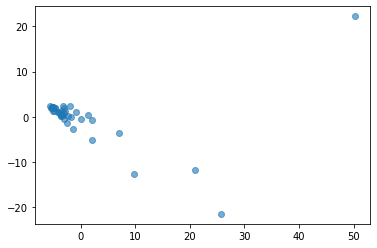

In [25]:
plt.scatter([e[0] for e in r], [e[1] for e in r], alpha=.6)

In [26]:
for i, case in enumerate(r):
    print(texts[i][:40].replace("\n", " "), case[0], case[1])

Heres the life of St. MAria Goretti, pos 20.888563261180973 -11.88221923274155
 A question for you - can you give me th 6.91099095293878 -3.683920182067989
 If you don't already know it, you shoul -5.190653765732617 1.2294878059475682
  I think you are vastly oversimplifying -0.07705748710815591 -0.5813748483996386
My brother has been alienated from my pa 9.79800341058532 -12.688910556109985
Is there anyone out there in NetLand tha -4.804292519202746 1.879478696866425
A "new Christian" wrote that he was new  1.9591114277945898 -0.7582900021479866
Hello,   I have a 92 Toyota 4X4 and in t -3.3477354058113225 0.35367082485507795
                            ^^^^^^^^^^^^ -2.089946478051476 2.4285794650817265
 	As a stong self-defense advocate, you' -3.645447207800208 0.2558613343150777
True.  Also read 2 Peter 3:16  Peter war -5.277169649831602 2.0616111995448745
 An interesting interpretation of Revela -2.413623971396889 0.22683960197842937
     This is the problem. This is not he -3.08832

In [29]:
i = 0
with open("output.csv", mode="w") as f:
    writer = csv.writer(f)
    for case in r:
        writer.writerow([texts[i], case[0], case[1]])
        i+=1

or, using pandas to convert to a `df`

In [27]:
import pandas as pd

df = pd.DataFrame(zip(texts, [e[0] for e in r], [e[1] for e in r]), columns=['texts', 'comp_1', 'comp_2']) 
df

,texts,comp_1,comp_2
0,"Heres the life of St. MAria Goretti, posted wi...",20.888563,-11.882219
1,\nA question for you - can you give me the nam...,6.910991,-3.683920
2,"\nIf you don't already know it, you should cal...",-5.190654,1.229488
3,\n\nI think you are vastly oversimplifying thi...,-0.077057,-0.581375
4,My brother has been alienated from my parents ...,9.798003,-12.688911
5,Is there anyone out there in NetLand that has/...,-4.804293,1.879479
6,"A ""new Christian"" wrote that he was new to the...",1.959111,-0.758290
7,"Hello,\n \nI have a 92 Toyota 4X4 and in the l...",-3.347735,0.353671
8,\n ^^^^^^^^^^^^^^^^^...,-2.089946,2.428579
9,"\n\tAs a stong self-defense advocate, you're '...",-3.645447,0.255861


if you want to display more texts, you may run:  
`df.style.set_properties(subset=['texts'], **{'width': '100px'})`

In [30]:
import pandas as pd
df = pd.read_csv("output.csv", header = None)
df

,0,1,2
0,"Heres the life of St. MAria Goretti, posted wi...",20.888563,-11.882219
1,\nA question for you - can you give me the nam...,6.910991,-3.683920
2,"\nIf you don't already know it, you should cal...",-5.190654,1.229488
3,\n\nI think you are vastly oversimplifying thi...,-0.077057,-0.581375
4,My brother has been alienated from my parents ...,9.798003,-12.688911
5,Is there anyone out there in NetLand that has/...,-4.804293,1.879479
6,"A ""new Christian"" wrote that he was new to the...",1.959111,-0.758290
7,"Hello,\n \nI have a 92 Toyota 4X4 and in the l...",-3.347735,0.353671
8,\n ^^^^^^^^^^^^^^^^^...,-2.089946,2.428579
9,"\n\tAs a stong self-defense advocate, you're '...",-3.645447,0.255861


## SVD

In [31]:
# make longer dataset
texts = autotexts + religiontexts
len(texts)

1193

In [32]:
mysvd = TruncatedSVD(n_components=2)
mypipe = make_pipeline(myvec, mysvd)
r = mypipe.fit_transform(texts)

In [18]:
TruncatedSVD?

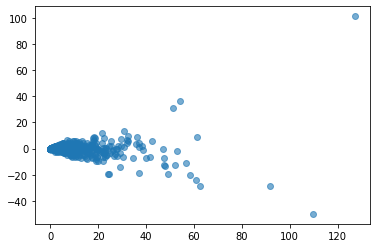

In [33]:
plt.scatter([e[0] for e in r], [e[1] for e in r], alpha=.6)

## clustering

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

k = 5

vec = TfidfVectorizer(min_df=5, max_df=.4)
features = vec.fit_transform(texts)
km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
predictions = km.fit_predict(features)

In [35]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()

print("Top terms per cluster:")

for i in range(k):
    print("Cluster {}: ".format(i), end='')
    for ind in order_centroids[i, :10]:
        print("{} ".format(terms[ind]), end='')
    print()

Top terms per cluster:
Cluster 0: re air want reading friend here year considered thanks phone 
Cluster 1: your people who will they do all than one by 
Cluster 2: car was they my had about cars an out at 
Cluster 3: he god we his was jesus who will they by 
Cluster 4: my can we me would there any what do about 


# Combining cluster analysis and dimensionality reduction

First, let's rewrite the code above to use a pipeline instead of separate steps. Note that this is equivalent to the code above.

In [36]:
k = 5
coolpipe = make_pipeline( TfidfVectorizer(min_df=5, max_df=.4), 
                         KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1))

mycoolpredictions = coolpipe.fit_predict(texts)

In [ ]:
# Now, lets add a SVD dimension reduction in between:

In [37]:
k = 5
evencoolerpipe = make_pipeline( TfidfVectorizer(min_df=5, max_df=.4), 
                               TruncatedSVD(n_components=10),
                               KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1))

mycoolestpredictions = evencoolerpipe.fit_predict(texts)

As you see, it's literally just adding the SVD in the middle of the pipe!